<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Intro to `pandas` Review

_Authors: Dave Yerrington (SF), Kiefer Katovich (SF)_

---

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### A. Explore _Mad Men_ Cast Data

---

#### 1. Load the _Mad Men_ cast data into a `pandas` DataFrame.

In [37]:
cast_data_csv = '../datasets/mad-men-cast-show-data.csv'

In [38]:
df = pd.read_csv(cast_data_csv, encoding='latin1')

#### 2. Print the head and tail of the data(frame).

In [39]:
df.head()

,Performer,Show,Show Start,Show End,Status?,CharEnd,Years Since,#LEAD,#SUPPORT,#Shows,Score,Score/Y,lead_notes,support_notes,show_notes
0,Steven Hill,Law & Order,1990,2010,END,2000,15,0,0,0,0.00,0,NaN,NaN,NaN
1,Kelli Williams,The Practice,1997,2014,END,2003,12,0,1,6,6.25,0.520833333,NaN,Any Day Now (2012),"Medical Investigation, Season 1; Lie To Me, Se..."
2,LisaGay Hamilton,The Practice,1997,2014,END,2003,12,2,0,2,4.00,0.333333333,"Life of a King, 2014; Go For Sisters, 2013",NaN,"Men of a Certain Age, Season 1-2"
3,Lara Flynn Boyle,The Practice,1997,2014,END,2003,12,0,0,0,0.00,0,NaN,NaN,NaN
4,Dylan McDermott,The Practice,1997,2014,END,2004,11,2,7,6,9.75,0.886363636,"Olympus Has Fallen, 2013; Freezer, 2014","The Messengers, 2007; Unbeatable Harold, 2009;...","Big Shots, Season 1; Dark Blue, Season 1-2; Am..."


In [40]:
df.tail()

,Performer,Show,Show Start,Show End,Status?,CharEnd,Years Since,#LEAD,#SUPPORT,#Shows,Score,Score/Y,lead_notes,support_notes,show_notes
243,Meghan Wolfe,True Detective,2014,PRESENT,LEFT,2014,1,0,0,0,0.00,0,NaN,NaN,NaN
244,Kevin Dunn,True Detective,2014,PRESENT,LEFT,2014,1,0,1,2,2.25,2.25,NaN,"Draft Day, 2014","Veep, Season 3-4"
245,Charles Dance,Game of Thrones,2011,PRESENT,LEFT,2015,0,0,2,1,1.50,#DIV/0!,NaN,"Woman in Gold, 2015; Child 44, 2015","Deadline Gallipoli, Season 1"
246,Patrick Dempsey,Grey's Anatomy,2005,PRESENT,LEFT,2015,0,0,0,0,0.00,#DIV/0!,NaN,NaN,NaN
247,Ian McElhinney,Game of Thrones,2011,PRESENT,LEFT,2015,0,0,0,0,0.00,#DIV/0!,NaN,NaN,NaN


#### 3. Print the columns of the data(frame).

In [41]:
df.columns

Index(['Performer', 'Show', 'Show Start', 'Show End', 'Status?', 'CharEnd',
       'Years Since', '#LEAD', '#SUPPORT', '#Shows', 'Score', 'Score/Y',
       'lead_notes', 'support_notes', 'show_notes'],
      dtype='object')

#### 4. Rename the columns by removing spaces and special characters. E.g. transform "#this is a * column _" in "thisisacolumn"

In [42]:
import string
# the string library has default strings that contain all letters or numbers
uppercase = string.ascii_uppercase
lowercase = string.ascii_lowercase



In [43]:
#version 1: rename with dictionary

new_columns = [''.join([c for c in column if c in uppercase+lowercase]) for column in df.columns.values]
column2newcolumns = dict(zip(df.columns, new_columns))
column2newcolumns

{'Performer': 'Performer',
 'Show': 'Show',
 'Show Start': 'ShowStart',
 'Show End': 'ShowEnd',
 'Status?': 'Status',
 'CharEnd': 'CharEnd',
 'Years Since': 'YearsSince',
 '#LEAD': 'LEAD',
 '#SUPPORT': 'SUPPORT',
 '#Shows': 'Shows',
 'Score': 'Score',
 'Score/Y': 'ScoreY',
 'lead_notes': 'leadnotes',
 'support_notes': 'supportnotes',
 'show_notes': 'shownotes'}

In [44]:
df.rename(columns=column2newcolumns).head()

,Performer,Show,ShowStart,ShowEnd,Status,CharEnd,YearsSince,LEAD,SUPPORT,Shows,Score,ScoreY,leadnotes,supportnotes,shownotes
0,Steven Hill,Law & Order,1990,2010,END,2000,15,0,0,0,0.00,0,NaN,NaN,NaN
1,Kelli Williams,The Practice,1997,2014,END,2003,12,0,1,6,6.25,0.520833333,NaN,Any Day Now (2012),"Medical Investigation, Season 1; Lie To Me, Se..."
2,LisaGay Hamilton,The Practice,1997,2014,END,2003,12,2,0,2,4.00,0.333333333,"Life of a King, 2014; Go For Sisters, 2013",NaN,"Men of a Certain Age, Season 1-2"
3,Lara Flynn Boyle,The Practice,1997,2014,END,2003,12,0,0,0,0.00,0,NaN,NaN,NaN
4,Dylan McDermott,The Practice,1997,2014,END,2004,11,2,7,6,9.75,0.886363636,"Olympus Has Fallen, 2013; Freezer, 2014","The Messengers, 2007; Unbeatable Harold, 2009;...","Big Shots, Season 1; Dark Blue, Season 1-2; Am..."


In [45]:
#version 2: rename with lambda

df.rename(columns=lambda column: ''.join([c for c in column if c in uppercase+lowercase]), inplace=True)

In [46]:
df.head()

,Performer,Show,ShowStart,ShowEnd,Status,CharEnd,YearsSince,LEAD,SUPPORT,Shows,Score,ScoreY,leadnotes,supportnotes,shownotes
0,Steven Hill,Law & Order,1990,2010,END,2000,15,0,0,0,0.00,0,NaN,NaN,NaN
1,Kelli Williams,The Practice,1997,2014,END,2003,12,0,1,6,6.25,0.520833333,NaN,Any Day Now (2012),"Medical Investigation, Season 1; Lie To Me, Se..."
2,LisaGay Hamilton,The Practice,1997,2014,END,2003,12,2,0,2,4.00,0.333333333,"Life of a King, 2014; Go For Sisters, 2013",NaN,"Men of a Certain Age, Season 1-2"
3,Lara Flynn Boyle,The Practice,1997,2014,END,2003,12,0,0,0,0.00,0,NaN,NaN,NaN
4,Dylan McDermott,The Practice,1997,2014,END,2004,11,2,7,6,9.75,0.886363636,"Olympus Has Fallen, 2013; Freezer, 2014","The Messengers, 2007; Unbeatable Harold, 2009;...","Big Shots, Season 1; Dark Blue, Season 1-2; Am..."


#### 5. Select the rows with the status of the show different from "END" and "End."

In [47]:
df[(df['Status']!='END') & (df['Status']!='End')].head(2)

,Performer,Show,ShowStart,ShowEnd,Status,CharEnd,YearsSince,LEAD,SUPPORT,Shows,Score,ScoreY,leadnotes,supportnotes,shownotes
157,Siobhan Finneran,Downton Abbey,2010,PRESENT,LEFT,2012,3,0,0,8,8.0,2.666666667,NaN,NaN,"The Syndicate, Season 2; Happy Valley, Season ..."
162,Eric Dane,Grey's Anatomy,2005,PRESENT,LEFT,2012,3,0,0,1,1.0,0.333333333,NaN,NaN,"The Last Ship, Season 1"


In [48]:
#different approach
df[~df['Status'].isin(['END','End'])].head(2)

,Performer,Show,ShowStart,ShowEnd,Status,CharEnd,YearsSince,LEAD,SUPPORT,Shows,Score,ScoreY,leadnotes,supportnotes,shownotes
157,Siobhan Finneran,Downton Abbey,2010,PRESENT,LEFT,2012,3,0,0,8,8.0,2.666666667,NaN,NaN,"The Syndicate, Season 2; Happy Valley, Season ..."
162,Eric Dane,Grey's Anatomy,2005,PRESENT,LEFT,2012,3,0,0,1,1.0,0.333333333,NaN,NaN,"The Last Ship, Season 1"


#### 6. Print out the performers where the show start is greater than 2005 and the score is greater than 7.

In [49]:
# double checking out dtypes to make sure they are correct.


In [50]:
df.dtypes

Performer        object
Show             object
ShowStart         int64
ShowEnd          object
Status           object
CharEnd           int64
YearsSince        int64
LEAD              int64
SUPPORT           int64
Shows             int64
Score           float64
ScoreY           object
leadnotes        object
supportnotes     object
shownotes        object
dtype: object

In [51]:
df[(df['ShowStart']>2005) & (df['Score']>7)].head(2)

,Performer,Show,ShowStart,ShowEnd,Status,CharEnd,YearsSince,LEAD,SUPPORT,Shows,Score,ScoreY,leadnotes,supportnotes,shownotes
95,Scott Porter,Friday Night Lights,2006,2011,END,2010,5,3,1,6,9.25,1.85,"The Good Guy, 2010; 10 Years, 2012; The To Do ...","Dear John, 2010","The Good Wife, Season 2; X-Men, Season 1; Hear..."
132,Connie Britton,Friday Night Lights,2006,2011,END,2011,4,3,1,4,7.25,1.8125,"The Fitzgerald Family Christmas, 2012; Angels ...","The To Do List, 2013","American Horror Story, Season 1; Nashville, Se..."


#### 7. Select the performer and show column for the 20th-25th LABELED rows.

In [52]:
df[20:25][['Performer','Show']]

,Performer,Show
20,Mary Steenburgen,Joan of Arcadia
21,Mathew St. Patrick,Six Feet Under
22,Michael Welch,Joan of Arcadia
23,Aaron Himelstein,Joan of Arcadia
24,Becky Wahlstrom,Joan of Arcadia


In [53]:
# you can use the same notation of lists iteration
df.loc[20:25:2, ['Performer','Show']]

,Performer,Show
20,Mary Steenburgen,Joan of Arcadia
22,Michael Welch,Joan of Arcadia
24,Becky Wahlstrom,Joan of Arcadia


#### 8. Plot a histogram of score.

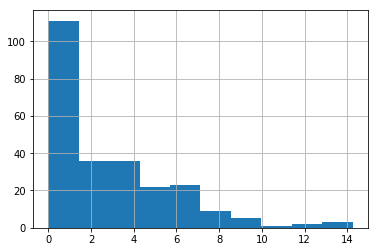

In [54]:
df['Score'].hist()

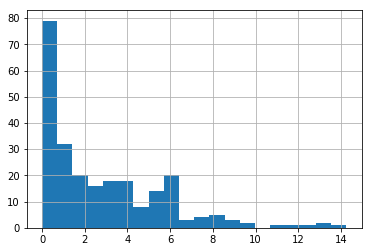

In [55]:
df['Score'].hist(bins=20)

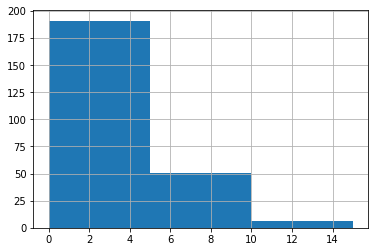

In [56]:
df['Score'].hist(bins=range(0,20,5))

### B. Explore San Francisco Crime Data

--- 

**9. Load the San Francisco crime data set into a DataFrame.**

In [57]:
crime_csv = '../datasets/sf_crime.csv'

In [58]:
df = pd.read_csv(crime_csv)

**10. Look at the dimensions of the crime data.**

In [59]:
df.shape

(25000, 9)

**11. Look at the data types of the columns and print out the column names.**

In [60]:
df.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

In [61]:
df.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

**12. How many distinct districts are there?**

In [62]:
df['PdDistrict'].drop_duplicates()

0        BAYVIEW
1       NORTHERN
2       SOUTHERN
3        TARAVAL
5        MISSION
6      INGLESIDE
8        CENTRAL
10    TENDERLOIN
15      RICHMOND
41          PARK
Name: PdDistrict, dtype: object

In [63]:
df['PdDistrict'].unique()

array(['BAYVIEW', 'NORTHERN', 'SOUTHERN', 'TARAVAL', 'MISSION',
       'INGLESIDE', 'CENTRAL', 'TENDERLOIN', 'RICHMOND', 'PARK'],
      dtype=object)

In [64]:
df['PdDistrict'].value_counts()

SOUTHERN      4413
MISSION       3416
NORTHERN      3076
BAYVIEW       2555
CENTRAL       2424
TENDERLOIN    2336
INGLESIDE     2256
TARAVAL       1804
PARK          1438
RICHMOND      1282
Name: PdDistrict, dtype: int64

**13. Which day of the week has the most crime?**

In [65]:
df['DayOfWeek'].value_counts()

Friday       3883
Wednesday    3657
Thursday     3579
Tuesday      3548
Monday       3524
Saturday     3496
Sunday       3313
Name: DayOfWeek, dtype: int64

In [66]:
df['DayOfWeek'].value_counts() / len(df)

Friday       0.15532
Wednesday    0.14628
Thursday     0.14316
Tuesday      0.14192
Monday       0.14096
Saturday     0.13984
Sunday       0.13252
Name: DayOfWeek, dtype: float64

#### 14. Make a new DataFrame featuring the crime categories and the number of crimes per category.

In [77]:
pd.DataFrame(df['Category'].value_counts())

,Category
LARCENY/THEFT,4934
OTHER OFFENSES,3656
NON-CRIMINAL,2601
ASSAULT,2164
DRUG/NARCOTIC,1533
VEHICLE THEFT,1506
VANDALISM,1280
WARRANTS,1239
BURGLARY,1023
SUSPICIOUS OCC,891


In [67]:
pd.DataFrame(df['Category'].value_counts()).reset_index(drop=False).head()

,index,Category
0,LARCENY/THEFT,4934
1,OTHER OFFENSES,3656
2,NON-CRIMINAL,2601
3,ASSAULT,2164
4,DRUG/NARCOTIC,1533


In [68]:
counts = df['Category'].value_counts()
df_new = pd.DataFrame(dict({'categories':counts.index, 
                            'crimes':counts.values}))
df_new.head()

,categories,crimes
0,LARCENY/THEFT,4934
1,OTHER OFFENSES,3656
2,NON-CRIMINAL,2601
3,ASSAULT,2164
4,DRUG/NARCOTIC,1533


In [75]:
# other approach
pd.DataFrame(df['Category'].value_counts().reset_index(drop=False)).head()

,index,Category
0,LARCENY/THEFT,4934
1,OTHER OFFENSES,3656
2,NON-CRIMINAL,2601
3,ASSAULT,2164
4,DRUG/NARCOTIC,1533


**15. Make a DataFrame that includes the districts and crime counts per district. Which district has the most crime?**

*Hint: You can use the `.sort_values()` function to sort your DataFrame by column.*

In [35]:
counts = df['PdDistrict'].value_counts()
df_new = pd.DataFrame(dict({'district':counts.index, 
                            'crimes':counts.values}))


df_new.sort_values(by=['crimes','col2'], ascending=False)

,district,crimes
0,SOUTHERN,4413
1,MISSION,3416
2,NORTHERN,3076
3,BAYVIEW,2555
4,CENTRAL,2424
5,TENDERLOIN,2336
6,INGLESIDE,2256
7,TARAVAL,1804
8,PARK,1438
9,RICHMOND,1282
